# ML Project 2 - Income Qualification

In [1]:
import pandas as pd
import numpy as np

# Understanding the Data
* Identify the output variable.
* Understand the type of data.

In [2]:
train = pd.read_csv('ml2train.csv')
test = pd.read_csv('ml2test.csv')

In [3]:
train

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [4]:
train.shape

(9557, 143)

In [5]:
train.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

In [6]:
test

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.2500,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.2500,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.2500,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.0000,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,ID_a065a7cad,NaN,1,2,1,1,1,0,NaN,0,...,10,9,100,36,25,4,36.00,0.25,33.0625,100
23852,ID_1a7c6953b,NaN,0,3,0,1,1,0,NaN,0,...,54,36,2916,16,36,4,4.00,1.00,36.0000,2916
23853,ID_07dbb4be2,NaN,0,3,0,1,1,0,NaN,0,...,12,16,144,16,36,4,4.00,1.00,36.0000,144
23854,ID_34d2ed046,NaN,0,3,0,1,1,0,NaN,0,...,12,25,144,16,36,4,4.00,1.00,36.0000,144


In [7]:
test.shape

(23856, 142)

In [8]:
test.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBhogar_nin         int64
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Length: 142, dtype: object

In [9]:
for col in train.columns:
    print("Column '{}' data type: {}".format(col,train[col].dtypes))

Column 'Id' data type: object
Column 'v2a1' data type: float64
Column 'hacdor' data type: int64
Column 'rooms' data type: int64
Column 'hacapo' data type: int64
Column 'v14a' data type: int64
Column 'refrig' data type: int64
Column 'v18q' data type: int64
Column 'v18q1' data type: float64
Column 'r4h1' data type: int64
Column 'r4h2' data type: int64
Column 'r4h3' data type: int64
Column 'r4m1' data type: int64
Column 'r4m2' data type: int64
Column 'r4m3' data type: int64
Column 'r4t1' data type: int64
Column 'r4t2' data type: int64
Column 'r4t3' data type: int64
Column 'tamhog' data type: int64
Column 'tamviv' data type: int64
Column 'escolari' data type: int64
Column 'rez_esc' data type: float64
Column 'hhsize' data type: int64
Column 'paredblolad' data type: int64
Column 'paredzocalo' data type: int64
Column 'paredpreb' data type: int64
Column 'pareddes' data type: int64
Column 'paredmad' data type: int64
Column 'paredzinc' data type: int64
Column 'paredfibras' data type: int64
Colum

# Missing Values
* Count how many null values are existing in columns.
* Remove null value rows of the target variable.

In [10]:
for col in train.columns:
    nullcount = train[col].isnull().sum()
    if nullcount != 0:
        print('Column {} missing count {}'.format(col,nullcount))

Column v2a1 missing count 6860
Column v18q1 missing count 7342
Column rez_esc missing count 7928
Column meaneduc missing count 5
Column SQBmeaned missing count 5


In [11]:
for df in [train,test]:
    df['v2a1'].fillna(value=0,inplace=True)

In [12]:
train['v2a1'].isnull().sum()

0

In [13]:
for df in [train,test]:
    df['v18q1'].fillna(value=0,inplace=True)
    
train['v18q1'].isnull().sum()

0

In [14]:
for df in [train,test]:
    df['rez_esc'].fillna(value=0,inplace=True)
    
train['rez_esc'].isnull().sum()

0

In [15]:
for df in [train,test]:
    df['meaneduc'].fillna(value=0,inplace=True)
    
train['meaneduc'].isnull().sum()

0

In [16]:
for df in[train,test]:
    df['SQBmeaned'].fillna(value=0,inplace=True)
    
train['SQBmeaned'].isnull().sum()

0

In [17]:
train.select_dtypes(object)

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,no
9553,ID_c94744e07,d6c086aa3,.25,9,no
9554,ID_85fc658f8,d6c086aa3,.25,9,no
9555,ID_ced540c61,d6c086aa3,.25,9,no


In [18]:
mapping = {'yes':1,'no':0}

In [19]:
for df in [train,test]:
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)

train[['dependency','edjefe','edjefa']].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


# Check for household members poverty level consistency

* Check whether all members of the house have the same poverty level.
* Check if there is a house without a family head.
* Set poverty level of the members and the head of the house within a family.

In [20]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)

In [21]:
not_equal = all_equal[all_equal != True]
print('{} households with inconsistent poverty level'.format(len(not_equal)))

85 households with inconsistent poverty level


In [22]:
household_head = train.groupby('idhogar')['parentesco1'].sum()

In [23]:
household_no_head = train.loc[train['idhogar'].isin(household_head[household_head == 0].index),:]

In [24]:
print('{} Household without head'.format(household_no_head['idhogar'].nunique()))

15 Household without head


In [25]:
household_no_head_equal = household_no_head.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)
print('{} Household with no head have different poverty levels'.format(sum(household_no_head_equal==False)))

0 Household with no head have different poverty levels


In [26]:
for household in not_equal.index:
    true_target = int(train[(train['idhogar']==household) & (train['parentesco1']==1.0)]['Target'])
    train.loc[train['idhogar']==household,'Target'] = true_target

In [27]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)

In [28]:
not_equal = all_equal[all_equal != True]
print('{} household with inconsistent poverty level'.format(len(not_equal)))

0 household with inconsistent poverty level


# Bias 
* Check if there are any biases in your dataset.

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [30]:
target_counts = train.groupby('idhogar')['Target'].first().value_counts().sort_index()

In [31]:
target_counts

1     222
2     442
3     369
4    1955
Name: Target, dtype: int64

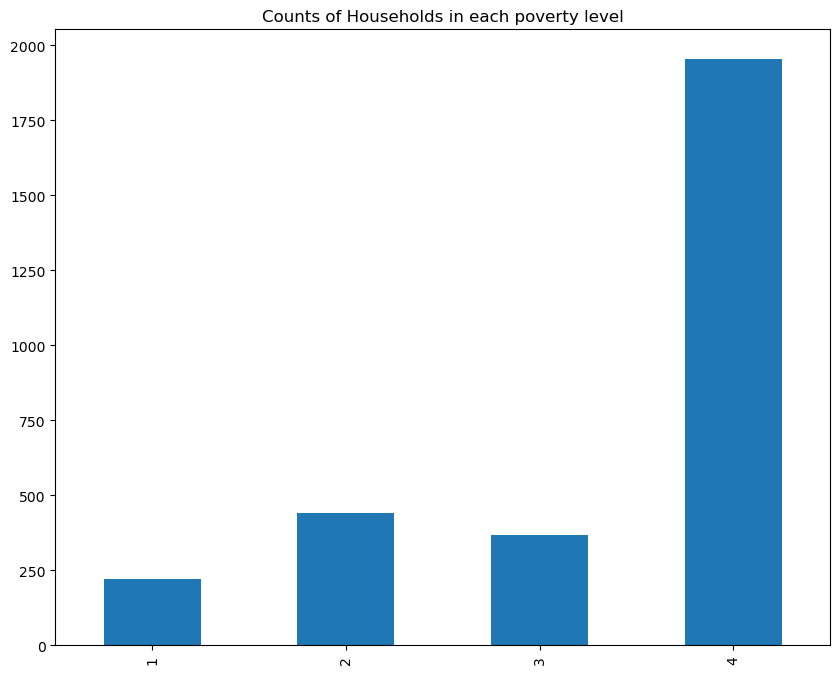

In [32]:
plot1 = target_counts.plot(kind='bar',figsize=(10,8), linewidth=2, title='Counts of Households in each poverty level')

In [33]:
train.shape

(9557, 143)

In [34]:
cols = ['SQBescolari','SQBage','SQBhogar_total','SQBedjefe','SQBhogar_nin','SQBovercrowding','SQBdependency','SQBmeaned','agesq','tamhog','hogar_total','r4t3','tamviv','male','area2','Id','idhogar']

In [35]:
for df in [train,test]:
    df.drop(columns=cols,inplace=True)

In [36]:
train.shape

(9557, 126)

# Prediction using Random Forest Classifier
* Predict the accuracy using random forest classifier.
* Check the accuracy using random forest with cross validation.

In [37]:
X_train_data = train.drop(['Target'],axis=1)
y_train_data = train['Target']

In [38]:
X_train_data

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age
0,190000.0,0,3,0,1,1,0,0.0,0,1,...,1,1,1,0,0,0,0,0,1,43
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,1,1,1,0,0,0,0,0,1,67
2,0.0,0,8,0,1,1,0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,92
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,1,3,1,0,0,0,0,0,1,17
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,1,3,1,0,0,0,0,0,1,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.0,0,6,0,1,1,0,0.0,0,2,...,1,3,0,0,0,0,0,1,0,46
9553,80000.0,0,6,0,1,1,0,0.0,0,2,...,1,3,0,0,0,0,0,1,0,2
9554,80000.0,0,6,0,1,1,0,0.0,0,2,...,1,3,0,0,0,0,0,1,0,50
9555,80000.0,0,6,0,1,1,0,0.0,0,2,...,1,3,0,0,0,0,0,1,0,26


In [39]:
y_train_data

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X_train_data,y_train_data,test_size=0.20,random_state=123)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier()

In [44]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
y_pred_train = rfc.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
ac_train_data = accuracy_score(y_test,y_pred_train)*100
cm_train_data = confusion_matrix(y_test,y_pred_train)
cr_train_data = classification_report(y_test,y_pred_train)

In [48]:
print('Accuracy Score :',ac_train_data)
print('----------------------------------------------------------')
print('Confusion Matrix \n',cm_train_data)
print('----------------------------------------------------------')
print('Classification Report \n',cr_train_data)

Accuracy Score : 93.82845188284519
----------------------------------------------------------
Confusion Matrix 
 [[ 125    3    1   22]
 [   0  276    1   32]
 [   0    3  186   56]
 [   0    0    0 1207]]
----------------------------------------------------------
Classification Report 
               precision    recall  f1-score   support

           1       1.00      0.83      0.91       151
           2       0.98      0.89      0.93       309
           3       0.99      0.76      0.86       245
           4       0.92      1.00      0.96      1207

    accuracy                           0.94      1912
   macro avg       0.97      0.87      0.91      1912
weighted avg       0.94      0.94      0.94      1912



In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
from sklearn.model_selection import KFold

In [51]:
kfold = KFold(n_splits=10,shuffle=True,random_state=7)
model1 = RandomForestClassifier(n_estimators=100,max_features=3)

In [52]:
score_train = cross_val_score(model1,X_train_data,y_train_data,cv=kfold,scoring='accuracy')

In [53]:
print('Cross Validation Accuracy :',score_train.mean()*100)

Cross Validation Accuracy : 91.32557120637912


# Accuracy from the Random Forest : 93.8%
# Accuracy from Cross Validation : 91.6%